<a href="https://colab.research.google.com/github/shreekanthsenthil/Automobile-Finance-Management/blob/master/Plant_Seedling_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import os
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import random
import cv2

from math import sqrt, floor

import tensorflow as tf
import datetime

%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# **ANALYSIS**

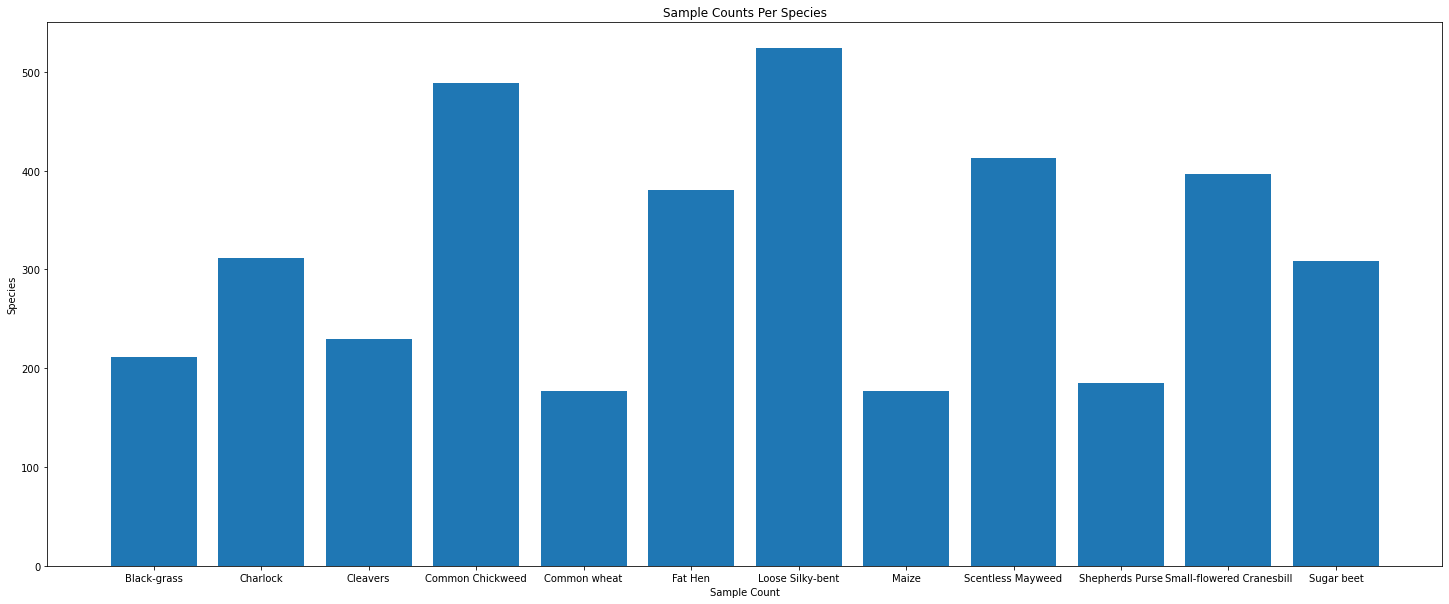

Black-grass :  211
Charlock :  312
Cleavers :  230
Common Chickweed :  489
Common wheat :  177
Fat Hen :  380
Loose Silky-bent :  524
Maize :  177
Scentless Mayweed :  413
Shepherds Purse :  185
Small-flowered Cranesbill :  397
Sugar beet :  308


In [30]:
classes = [
           'Black-grass',
           'Charlock',
           'Cleavers',
           'Common Chickweed',
           'Common wheat',
           'Fat Hen',
           'Loose Silky-bent',
           'Maize',
           'Scentless Mayweed',
           'Shepherds Purse',
           'Small-flowered Cranesbill',
           'Sugar beet'
           ]

sample_counts = []

for className in classes:
  if os.path.isdir(os.path.join('./Dataset/train', className)):
    sample_counts.append(len(os.listdir(os.path.join('./Dataset/train', className))))
  else:
    print(className)

plt.figure(figsize=(25,10))
plt.bar(classes, sample_counts)
plt.title('Sample Counts Per Species')
plt.ylabel('Species')
plt.xlabel('Sample Count')
plt.show()

for i in range(len(classes)):
  print(classes[i] + " : " , sample_counts[i])


 Black-grass


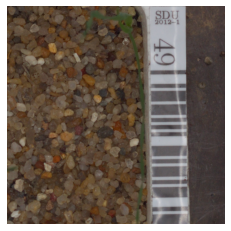


 Charlock


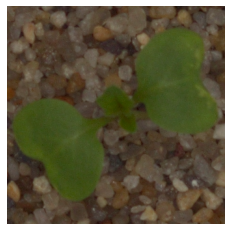


 Cleavers


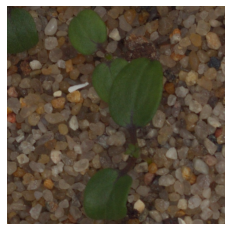


 Common Chickweed


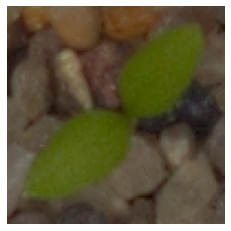


 Common wheat


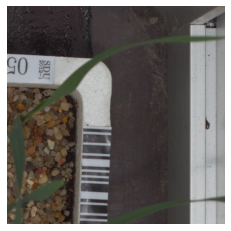


 Fat Hen


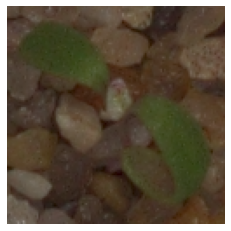


 Loose Silky-bent


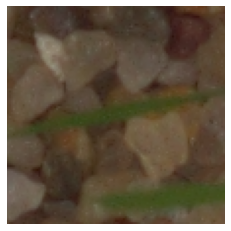


 Maize


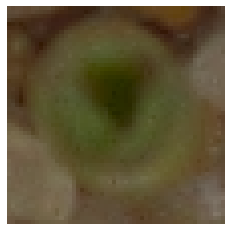


 Scentless Mayweed


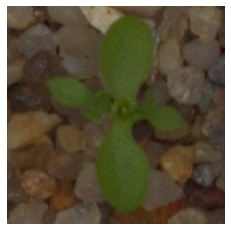


 Shepherds Purse


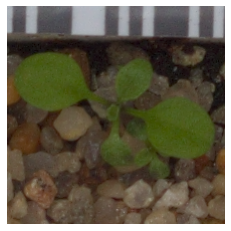


 Small-flowered Cranesbill


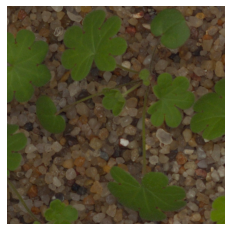


 Sugar beet


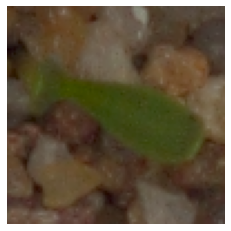

In [ ]:
for i in range(12):
  sample_path = os.path.join('./Dataset/train', classes[i])
  random_image_path = os.path.join(sample_path, random.choice(os.listdir(sample_path)))
  print("\n", classes[i])
  random_image = cv2.imread(random_image_path)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB))
  plt.show()


# **PRE-PROCESSING**

In [ ]:
for i in range(12):
  sample_path = os.path.join('/content/drive/MyDrive/SE Project/Dataset/train', classes[i])
  random_image_path = os.path.join(sample_path, random.choice(os.listdir(sample_path)))
  print("\n", classes[i])
  random_image = cv2.imread(random_image_path)
  print(random_image.shape)


 Black-grass
(614, 615, 3)

 Charlock
(311, 311, 3)

 Cleavers
(540, 540, 3)

 Common Chickweed
(106, 106, 3)

 Common wheat
(745, 745, 3)

 Fat Hen
(336, 336, 3)

 Loose Silky-bent
(211, 211, 3)

 Maize
(866, 866, 3)

 Scentless Mayweed
(126, 126, 3)

 Shepherds Purse
(119, 119, 3)

 Small-flowered Cranesbill
(748, 748, 3)

 Sugar beet
(1036, 1036, 3)


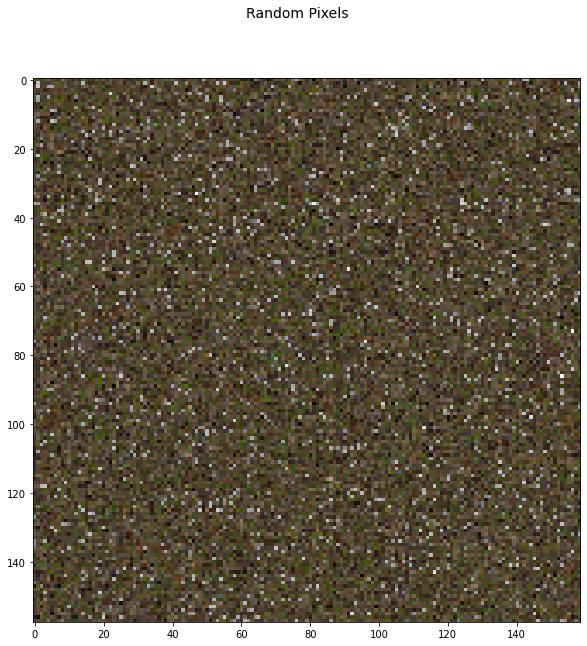

In [ ]:
def generate_random_pixel_image(samples_per_class, pixels_per_image):
  total_pixels = 12*samples_per_class * pixels_per_image
  random_pixels = np.zeros((total_pixels, 3), dtype=np.uint8)
  for i in range(12):
    sample_class = os.path.join('/content/drive/MyDrive/SE Project/Dataset/train', classes[i])
    for j in range(samples_per_class):
      random_image = os.path.join(sample_class, random.choice(os.listdir(sample_class)))
      image = cv2.imread(random_image)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      image = np.reshape(image, (image.shape[0]*image.shape[1] , 3))
      new_pixels = image[np.random.randint(0, image.shape[0], pixels_per_image)]
      start_index = pixels_per_image * (i * samples_per_class + j)
      random_pixels[start_index: start_index+pixels_per_image, :] = new_pixels

  h = floor(sqrt(total_pixels))
  w = total_pixels//h

  random_pixels = random_pixels[np.random.choice(total_pixels, h*w, replace=False)]
  random_pixels = np.reshape(random_pixels, (h, w, 3))
  return random_pixels
      


random_pixels = generate_random_pixel_image(30,70)

plt.figure(figsize=(10,10))
plt.suptitle('Random Pixels', fontsize=14, horizontalalignment='center')
plt.imshow(random_pixels)
plt.show()

Plot Random Pixels in RGB Space

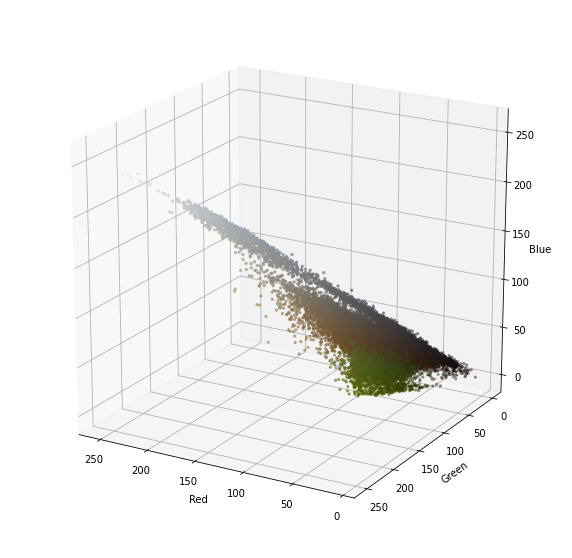

In [ ]:

r, g, b = cv2.split(random_pixels)
fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.view_init(20, 120)

pixel_colors = random_pixels.reshape((np.shape(random_pixels)[0]*np.shape(random_pixels)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()


axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

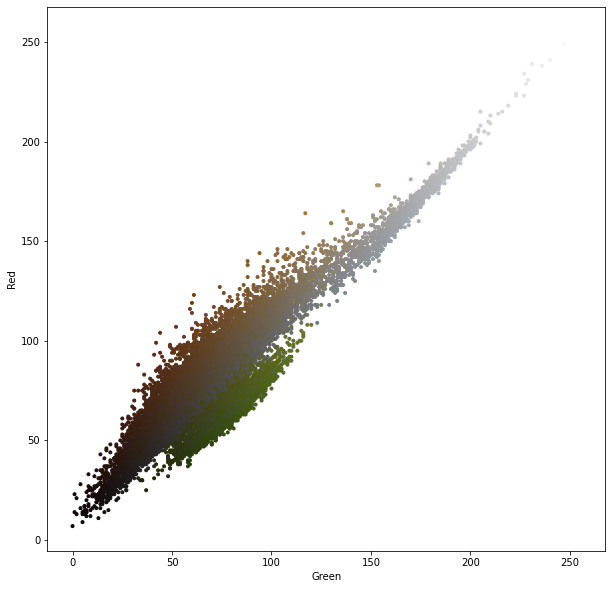

In [ ]:
r, g, b = cv2.split(random_pixels)
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(1, 1, 1)

axis.scatter(g.flatten(), r.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Green")
axis.set_ylabel("Red")
plt.show()

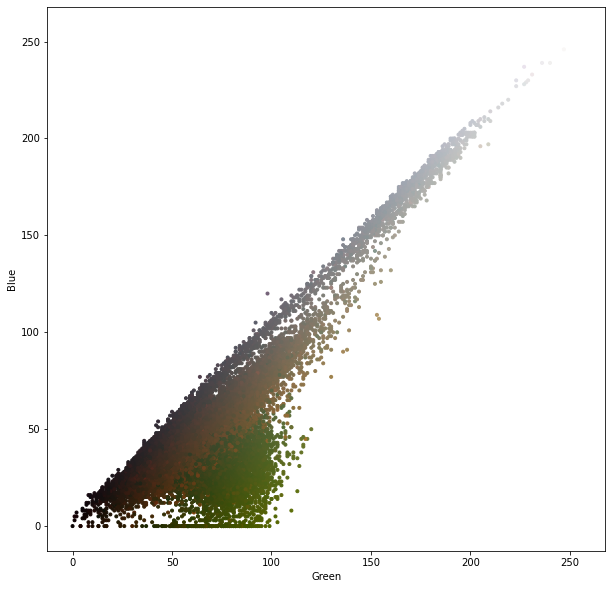

In [ ]:
r, g, b = cv2.split(random_pixels)
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(1, 1, 1)

axis.scatter(g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Green")
axis.set_ylabel("Blue")
plt.show()

Plot Random Pixels in HSV Space

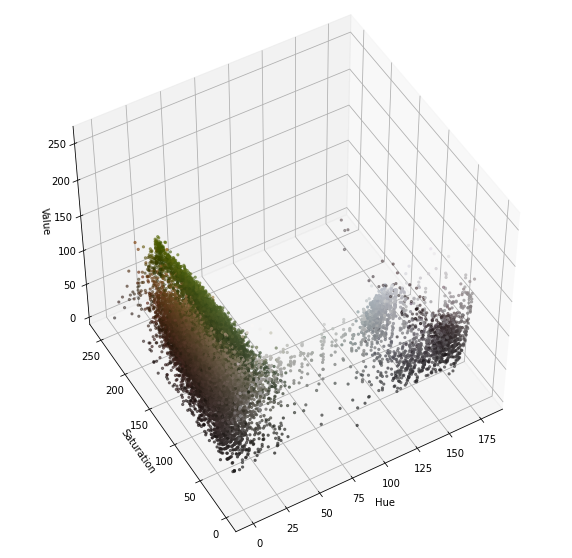

In [ ]:
hsv_image = cv2.cvtColor(np.uint8(random_pixels), cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_image)
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(1,1,1, projection="3d")
axis.view_init(50,240)

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

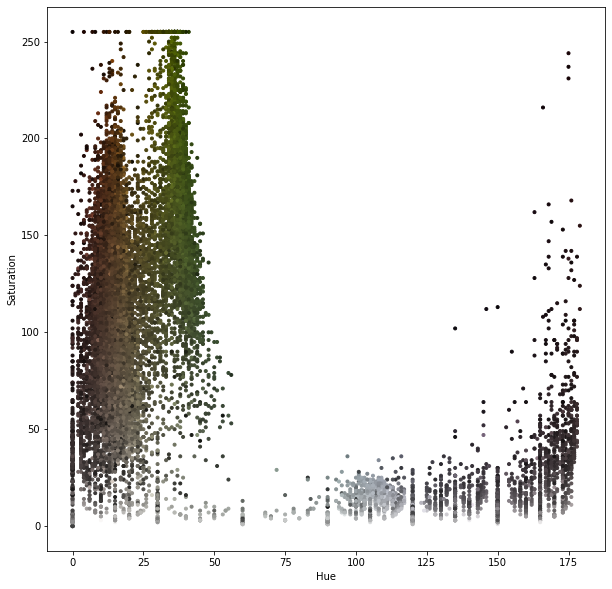

In [ ]:
hsv_img = cv2.cvtColor(np.uint8(random_pixels), cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_img)
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(1, 1, 1)

axis.scatter(h.flatten(), s.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
plt.show()

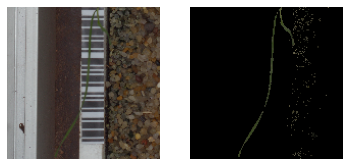

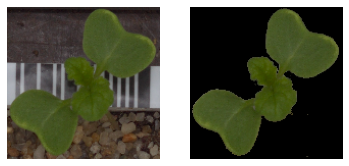

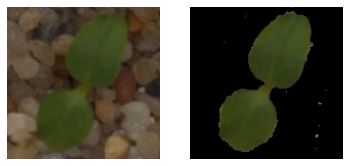

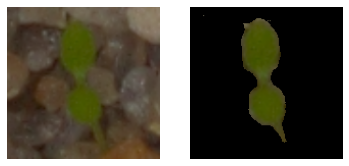

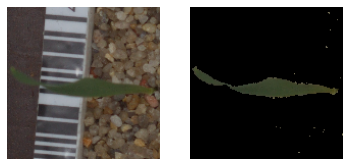

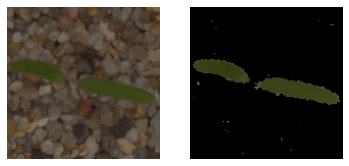

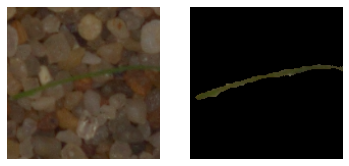

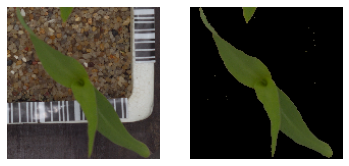

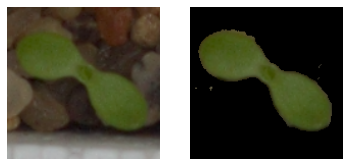

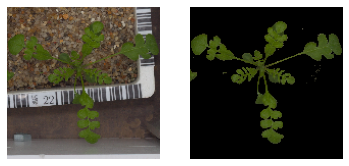

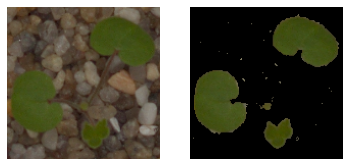

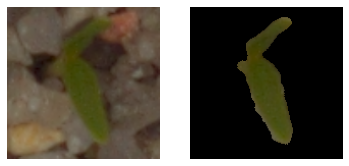

In [86]:
lower_bound= (24, 50, 0)
upper_bound= (55, 255, 255)

for i in range(12):
    sample_class=os.path.join('./Dataset/train',classes[i])
    random_image= os.path.join(sample_class, random.choice(os.listdir(sample_class)))
    img= cv2.imread(random_image)
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img= cv2.resize(img, (150, 150))
    
    hsv_img= cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv_img, lower_bound, upper_bound)
    result = cv2.bitwise_and(img, img, mask=mask)

    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
    # plt.show()

    plt.subplot(1,2,2)
    plt.imshow(result)
    plt.axis('off')
    plt.show()
    
# plt.show()

In [57]:
def pre_processing_function(image): 
  image = np.rint(image)
  image = image.astype('uint8')
  hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  mask = cv2.inRange(hsv_image, (24, 50, 0), (55, 255, 255))
  result = cv2.bitwise_and(image, image, mask=mask)
  # result = result.astype('float64')
  return result

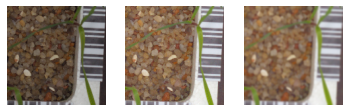

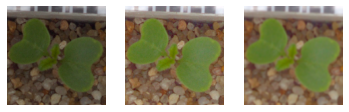

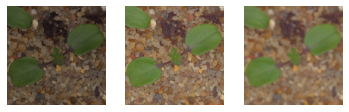

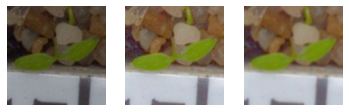

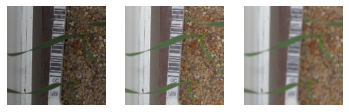

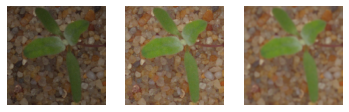

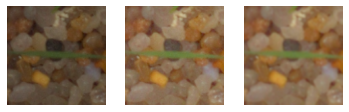

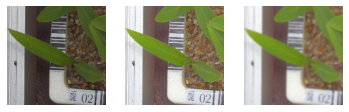

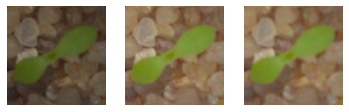

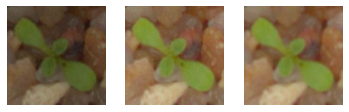

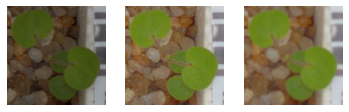

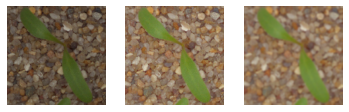

In [119]:
lower_bound= (24, 50, 0)
upper_bound= (55, 255, 255)

for i in range(12):
    sample_class=os.path.join('./Dataset/train',classes[i])
    random_image= os.path.join(sample_class, random.choice(os.listdir(sample_class)))
    img= cv2.imread(random_image)
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img= cv2.resize(img, (150, 150))
    value = 50
    
    hsv_img= cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv_img)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    brighten = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
    result = cv2.GaussianBlur(brighten, (5,5), 0)

    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.axis('off')
    # plt.show()

    plt.subplot(1,3,2)
    plt.imshow(brighten)
    plt.axis('off')
    # plt.show()
    
    plt.subplot(1,3,3)
    plt.imshow(result)
    plt.axis('off')
    plt.show()
    

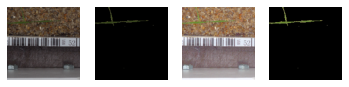

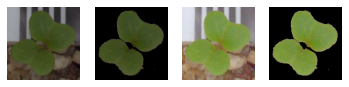

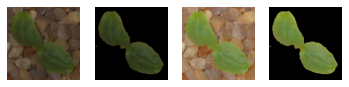

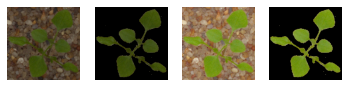

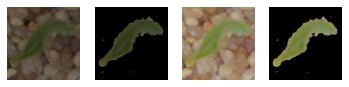

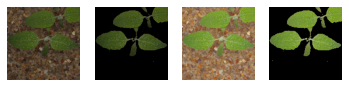

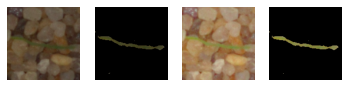

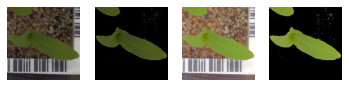

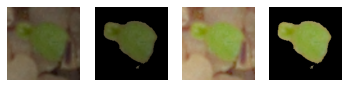

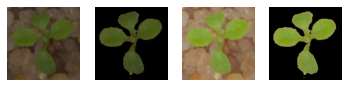

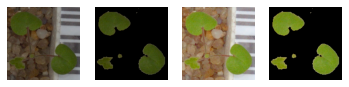

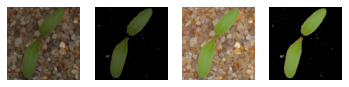

In [137]:
lower_bound= (24, 50, 0)
upper_bound= (55, 255, 255)

for i in range(12):
    sample_class=os.path.join('./Dataset/train',classes[i])
    random_image= os.path.join(sample_class, random.choice(os.listdir(sample_class)))
    img= cv2.imread(random_image)
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img= cv2.resize(img, (150, 150))
    value = 70
    
    hsv_image_bg_remove = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    mask_bg_remove = cv2.inRange(hsv_image_bg_remove, (24, 50, 0), (55, 255, 255))
    result_bg_remove = cv2.bitwise_and(img, img, mask=mask_bg_remove)
    
    hsv_img_brigthen = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv_img_brigthen)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv_brigthen = cv2.merge((h, s, v))
    result_brighten = cv2.cvtColor(final_hsv_brigthen, cv2.COLOR_HSV2RGB)
    result_brigthen = cv2.GaussianBlur(result_brighten, (5,5), 0)

    hsv_image_final = cv2.cvtColor(result_brighten, cv2.COLOR_RGB2HSV)
    mask_final = cv2.inRange(hsv_image_final, (24, 50, 0), (55, 255, 255))
    result_final = cv2.bitwise_and(result_brighten, result_brighten, mask=mask_final)

    plt.subplot(1,4,1)
    plt.imshow(img)
    plt.axis('off')
    # plt.show()

    plt.subplot(1,4,2)
    plt.imshow(result_bg_remove)
    plt.axis('off')
    # plt.show()
    
    plt.subplot(1,4,3)
    plt.imshow(result_brighten)
    plt.axis('off')
    # plt.show()

    plt.subplot(1,4,4)
    plt.imshow(result_final)
    plt.axis('off')
    plt.show()
    

In [194]:
def pre_processing_remove_bg(img_array):
    img_array = np.rint(img_array)
    img_array = img_array.astype('uint8')
    hsv_img = cv2.cvtColor(img_array, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv_img, (24, 50, 0), (55, 255, 255))
    result = cv2.bitwise_and(img_array, img_array, mask=mask)
    result = result.astype('float64')
    return result

In [209]:
def pre_processing_brighten(img_array):
    img_array= np.rint(img_array)
    img_array= img_array.astype('uint8')
    hsv_img= cv2.cvtColor(img_array, cv2.COLOR_RGB2HSV)
    value = 100
    hsv_img_brigthen = cv2.cvtColor(img_array, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv_img_brigthen)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv_brigthen = cv2.merge((h, s, v))
    result_brighten = cv2.cvtColor(final_hsv_brigthen, cv2.COLOR_HSV2RGB)
    result_brigthen = cv2.GaussianBlur(result_brighten, (5,5), 0)

    result= result_brighten.astype('float64')
    return result

In [210]:
def pre_processing_combined(img_array):
    img_array = np.rint(img_array)
    img_array = img_array.astype('uint8')

    value = 100
    hsv_img_brigthen = cv2.cvtColor(img_array, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv_img_brigthen)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv_brigthen = cv2.merge((h, s, v))
    result_brighten = cv2.cvtColor(final_hsv_brigthen, cv2.COLOR_HSV2RGB)
    result_brighten = cv2.GaussianBlur(result_brighten, (5,5), 0)

    hsv_img = cv2.cvtColor(result_brighten, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv_img, (24, 50, 0), (55, 255, 255))
    result = cv2.bitwise_and(result_brighten, result_brighten, mask=mask)
    result= result.astype('float64')
    return result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


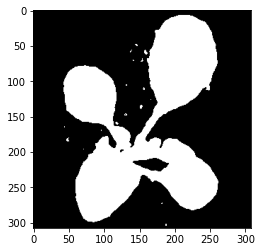

In [198]:
img = cv2.imread("./Dataset/train/Shepherds Purse/00dd0d16a.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = pre_processing_combined(img)

plt.imshow(img)
plt.show()

# **Creating Validation Set**

In [ ]:
def create_validation(split = 0.2):
  if os.path.isdir('./Dataset/validation'):
    print("Validation Set Already Exist")
    return
  os.mkdir('./Dataset/validation')
  for f in os.listdir('./Dataset/train'):
    train_class = os.path.join('./Dataset/train', f)
    if os.path.isdir(train_class):
      validation_class = os.path.join('./Dataset/validation', f)
      os.mkdir(validation_class)
      img_move = int(split * len(os.listdir(train_class)))
      for i in range(img_move):
        image = os.path.join(train_class, random.choice(os.listdir(train_class)))
        shutil.move(image, validation_class)
  print('Validation Set Created')

In [ ]:
create_validation()

Validation Set Created


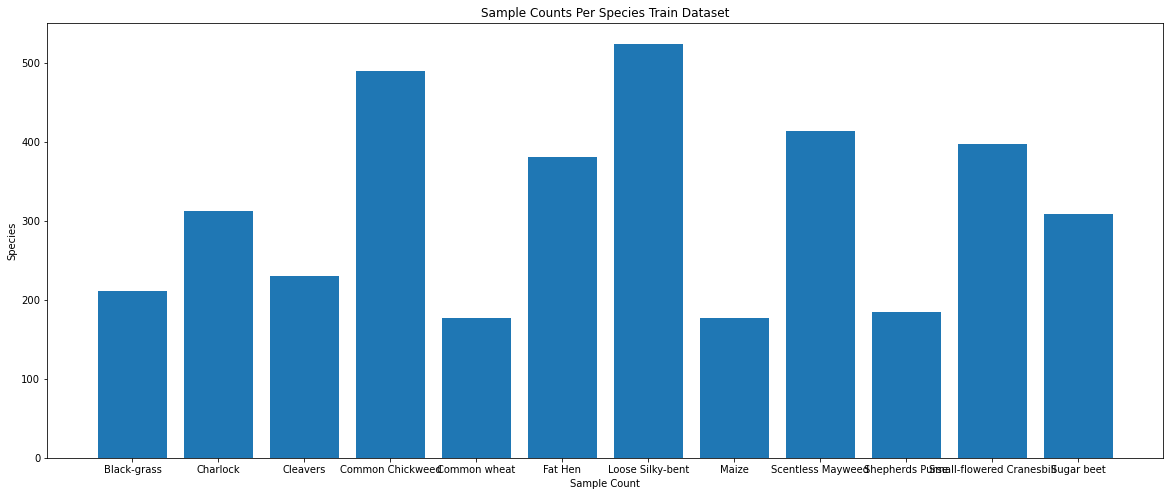

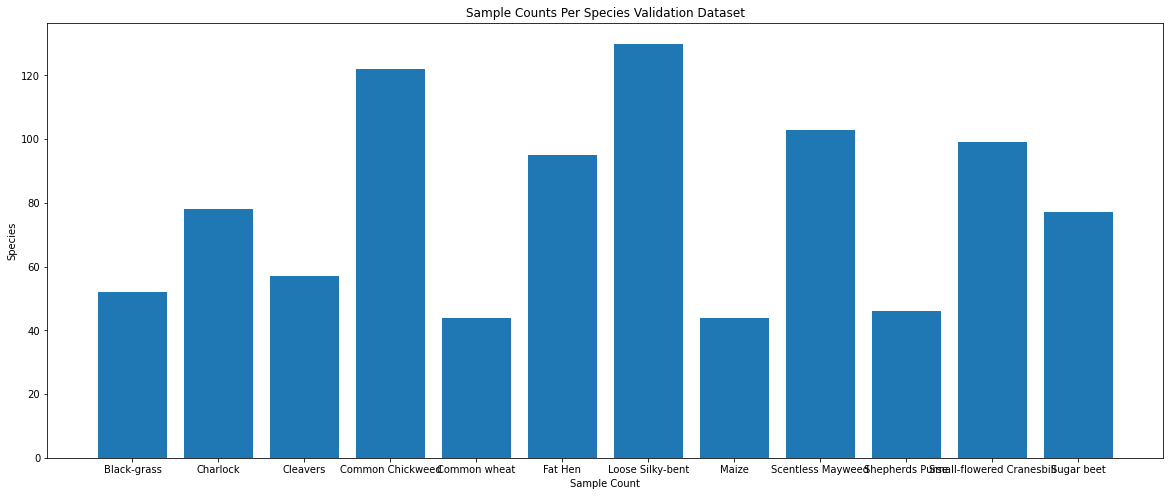

In [ ]:
classes = [
           'Black-grass',
           'Charlock',
           'Cleavers',
           'Common Chickweed',
           'Common wheat',
           'Fat Hen',
           'Loose Silky-bent',
           'Maize',
           'Scentless Mayweed',
           'Shepherds Purse',
           'Small-flowered Cranesbill',
           'Sugar beet'
           ]

sample_counts = []

for className in classes:
  if os.path.isdir(os.path.join('./Dataset/train', className)):
    sample_counts.append(len(os.listdir(os.path.join('./Dataset/train', className))))
  else:
    print(className)

plt.figure(figsize=(20,8))
plt.bar(classes, sample_counts)
plt.title('Sample Counts Per Species Train Dataset')
plt.ylabel('Species')
plt.xlabel('Sample Count')
plt.show()

sample_counts = []

for className in classes:
  if os.path.isdir(os.path.join('./Dataset/validation', className)):
    sample_counts.append(len(os.listdir(os.path.join('./Dataset/validation', className))))
  else:
    print(className)

plt.figure(figsize=(20,8))
plt.bar(classes, sample_counts)
plt.title('Sample Counts Per Species Validation Dataset')
plt.ylabel('Species')
plt.xlabel('Sample Count')
plt.show()


# **Data Generation**

In [211]:
# Uses Data Augumentation to prepare the model

train_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=True,
    vertical_flip= True,
    preprocessing_function = pre_processing_function,
    fill_mode='nearest'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, preprocessing_function=pre_processing_function)

In [212]:
def train_data_generator(pre_processing_function):
  return tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range = 40,
      width_shift_range=0.0,
      height_shift_range=0.0,
      shear_range=0.0,
      zoom_range=0.0,
      horizontal_flip=True,
      vertical_flip= True,
      preprocessing_function = pre_processing_function,
      fill_mode='nearest'
  )

def test_data_generator(pre_processing_function):
  return tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, preprocessing_function=pre_processing_function)

In [213]:
train_generator_remove_bg = train_data_generator(pre_processing_remove_bg).flow_from_directory(
  './Dataset/train',
  target_size=(150, 150),
  batch_size=20,
  class_mode='categorical')

validation_generator_remove_bg = test_data_generator(pre_processing_remove_bg).flow_from_directory(
        './Dataset/validation',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')


train_generator_brighten = train_data_generator(pre_processing_brighten).flow_from_directory(
  './Dataset/train',
  target_size=(150, 150),
  batch_size=20,
  class_mode='categorical')

validation_generator_brighten = train_data_generator(pre_processing_brighten).flow_from_directory(
        './Dataset/validation',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

train_generator_combined = train_data_generator(pre_processing_combined).flow_from_directory(
  './Dataset/train',
  target_size=(150, 150),
  batch_size=20,
  class_mode='categorical')

validation_generator_combined = train_data_generator(pre_processing_combined).flow_from_directory(
        './Dataset/validation',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.
Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.
Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.


# **MODEL**

In [37]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.1))


model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.1))



model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.1))


model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.1))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(12, activation='softmax'))

In [202]:
def create_model():
  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
  # flatten output of conv
  model.add(tf.keras.layers.Flatten())
  # hidden layer
  model.add(tf.keras.layers.Dense(100, activation='relu'))
  # output layer
  model.add(tf.keras.layers.Dense(12, activation='softmax'))

  return model

In [203]:
model_remove_bg = create_model()
model_brighten = create_model()
model_combined = create_model()

In [204]:
model_combined.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               17523300  
_________________________________________________________________
dense_17 (Dense)             (None, 12)                1212      
Total params: 17,525,408
Trainable params: 17,525,408
Non-trainable params: 0
_________________________________________________________________


In [205]:
def create_model_saver(path):
  model_saver_callback = tf.keras.callbacks.ModelCheckpoint(path, 
                                          monitor='val_loss', 
                                          verbose=1, 
                                          save_best_only=True, 
                                          save_weights_only=False, 
                                          mode='auto', 
                                          save_freq='epoch')
  return model_saver_callback

opt= tf.keras.optimizers.Adam(lr=0.0005, amsgrad=True)

In [206]:
model_remove_bg_saver_callback = create_model_saver("./models/model_remove_bg.h5")
model_brighten_saver_callback = create_model_saver("./models/model_brighten.h5")
model_combined_saver_callback = create_model_saver("./models/model_combined.h5")

In [ ]:
# SAMPLE

model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

log_dir = "./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
                    train_generator,
                    class_weight= class_weight,
                    steps_per_epoch= 190,
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps= 48,
                    verbose=1,
                    callbacks= [best_cb, tensorboard_callback])

In [207]:
model_remove_bg.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

log_dir = "./logs/fit/model_remove_bg"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model_remove_bg.fit(
                    train_generator_remove_bg,
                    class_weight= class_weight,
                    steps_per_epoch= 150,
                    epochs=15,
                    validation_data=validation_generator_remove_bg,
                    validation_steps= 45,
                    verbose=1,
                    callbacks= [model_remove_bg_saver_callback, tensorboard_callback])

Epoch 1/15
150/150 [==============================] - ETA: 0s - loss: 1.6452 - accuracy: 0.3227
Epoch 00001: val_loss improved from inf to 1.46481, saving model to ./models/model_remove_bg.h5
150/150 [==============================] - 168s 1s/step - loss: 1.6452 - accuracy: 0.3227 - val_loss: 1.4648 - val_accuracy: 0.4400
Epoch 2/15
150/150 [==============================] - ETA: 0s - loss: 1.0919 - accuracy: 0.5595
Epoch 00002: val_loss improved from 1.46481 to 1.08073, saving model to ./models/model_remove_bg.h5
150/150 [==============================] - 168s 1s/step - loss: 1.0919 - accuracy: 0.5595 - val_loss: 1.0807 - val_accuracy: 0.6268
Epoch 3/15
150/150 [==============================] - ETA: 0s - loss: 0.8854 - accuracy: 0.6333
Epoch 00003: val_loss improved from 1.08073 to 1.07688, saving model to ./models/model_remove_bg.h5
150/150 [==============================] - 148s 985ms/step - loss: 0.8854 - accuracy: 0.6333 - val_loss: 1.0769 - val_accuracy: 0.6020
Epoch 4/15
150/15

In [214]:
model_brighten.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

log_dir = "./logs/fit/model_brighten"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model_brighten.fit(
                    train_generator_brighten,
                    class_weight= class_weight,
                    steps_per_epoch= 150,
                    epochs=15,
                    validation_data=validation_generator_brighten,
                    validation_steps= 45,
                    verbose=1,
                    callbacks= [model_brighten_saver_callback, tensorboard_callback])

Epoch 1/15
150/150 [==============================] - ETA: 0s - loss: 3.0142 - accuracy: 0.1370
Epoch 00001: val_loss improved from inf to 2.12010, saving model to ./models/model_brighten.h5
150/150 [==============================] - 157s 1s/step - loss: 3.0142 - accuracy: 0.1370 - val_loss: 2.1201 - val_accuracy: 0.1878
Epoch 2/15
150/150 [==============================] - ETA: 0s - loss: 1.7944 - accuracy: 0.2759
Epoch 00002: val_loss improved from 2.12010 to 1.92056, saving model to ./models/model_brighten.h5
150/150 [==============================] - 130s 866ms/step - loss: 1.7944 - accuracy: 0.2759 - val_loss: 1.9206 - val_accuracy: 0.3439
Epoch 3/15
150/150 [==============================] - ETA: 0s - loss: 1.6371 - accuracy: 0.4030
Epoch 00003: val_loss improved from 1.92056 to 1.80070, saving model to ./models/model_brighten.h5
150/150 [==============================] - 151s 1s/step - loss: 1.6371 - accuracy: 0.4030 - val_loss: 1.8007 - val_accuracy: 0.3980
Epoch 4/15
150/150 [

In [215]:
model_combined.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

log_dir = "./logs/fit/model_combined"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model_combined.fit(
                    train_generator_combined,
                    class_weight= class_weight,
                    steps_per_epoch= 150,
                    epochs=15,
                    validation_data=validation_generator_combined,
                    validation_steps= 45,
                    verbose=1,
                    callbacks= [model_combined_saver_callback, tensorboard_callback])

Epoch 1/15
150/150 [==============================] - ETA: 0s - loss: 2.0458 - accuracy: 0.2233
Epoch 00001: val_loss improved from inf to 1.63093, saving model to ./models/model_combined.h5
150/150 [==============================] - 141s 943ms/step - loss: 2.0458 - accuracy: 0.2233 - val_loss: 1.6309 - val_accuracy: 0.3900
Epoch 2/15
150/150 [==============================] - ETA: 0s - loss: 1.2941 - accuracy: 0.4519
Epoch 00002: val_loss improved from 1.63093 to 1.29749, saving model to ./models/model_combined.h5
150/150 [==============================] - 134s 893ms/step - loss: 1.2941 - accuracy: 0.4519 - val_loss: 1.2975 - val_accuracy: 0.5581
Epoch 3/15
150/150 [==============================] - ETA: 0s - loss: 1.1042 - accuracy: 0.5501
Epoch 00003: val_loss improved from 1.29749 to 1.23198, saving model to ./models/model_combined.h5
150/150 [==============================] - 139s 926ms/step - loss: 1.1042 - accuracy: 0.5501 - val_loss: 1.2320 - val_accuracy: 0.5344
Epoch 4/15
150

In [216]:
model_remove_bg.save("./model_remove_bg.h5")
model_brighten.save("./model_brighten.h5")
model_combined.save("./model_combined.h5")

In [ ]:
%tensorboard --logdir ./logs/fit